In [6]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [7]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
# 并处以255是的所有像素的数值均在0到1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root='../data', train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root='../data', train=False, transform=trans, download=True)

In [8]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [9]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [10]:
def get_fashion_mnist_labels(labels):
    # @save
    '''返回Fashion-MNIST数据集的文本标签'''
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [11]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=2):
    # @save
    '''绘制图像列表'''
    figsize = (num_rows*scale, num_cols*scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

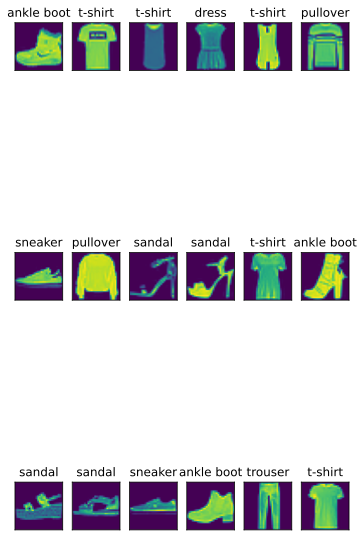

In [12]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18,28,28), 3, 6, titles=get_fashion_mnist_labels(y));

In [13]:
batch_size = 256

def get_dataloader_workers():
    # @save
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers())

In [14]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'0.95 sec'

In [15]:
def load_data_fashion_mnist(batch_size, resize=None):
    # @save
    '''下载Fashion-MNIST数据集，然后将其加载到内存中'''
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root='../data', train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root='../data', train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                           num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_test, batch_size, shuffle=False,
                          num_workers=get_dataloader_workers()))

In [16]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64
